박해선님은 `Python 3.7`을 이용하셨지만, 저는 `Python 3.9`를 이용하였습니다.
# 2장 예제 1-1

In [93]:
# assert : 조건문을 이용하여 조건에 맞는 버전을 import해줌
import sys
assert sys.version_info >= (3,5)
import sklearn
assert sklearn.__version__ >= '0.20'

import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings(action='ignore', message='^internal gelad')

# 그래프 설정
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# 모든 Plot에 Font크기 설정
mpl.rc('axes', labelsize=14) 
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "../"
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# 데이터 가져오기

In [94]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("..","datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

In [95]:
import pyarrow.csv as csv
# 다운받은 집값 데이터 가져오기
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return csv.read_csv(csv_path).to_pandas()
housing = load_housing_data()
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [96]:
# housing의 상세 정보 보기
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


그림 저장: attribute_histogram_plots


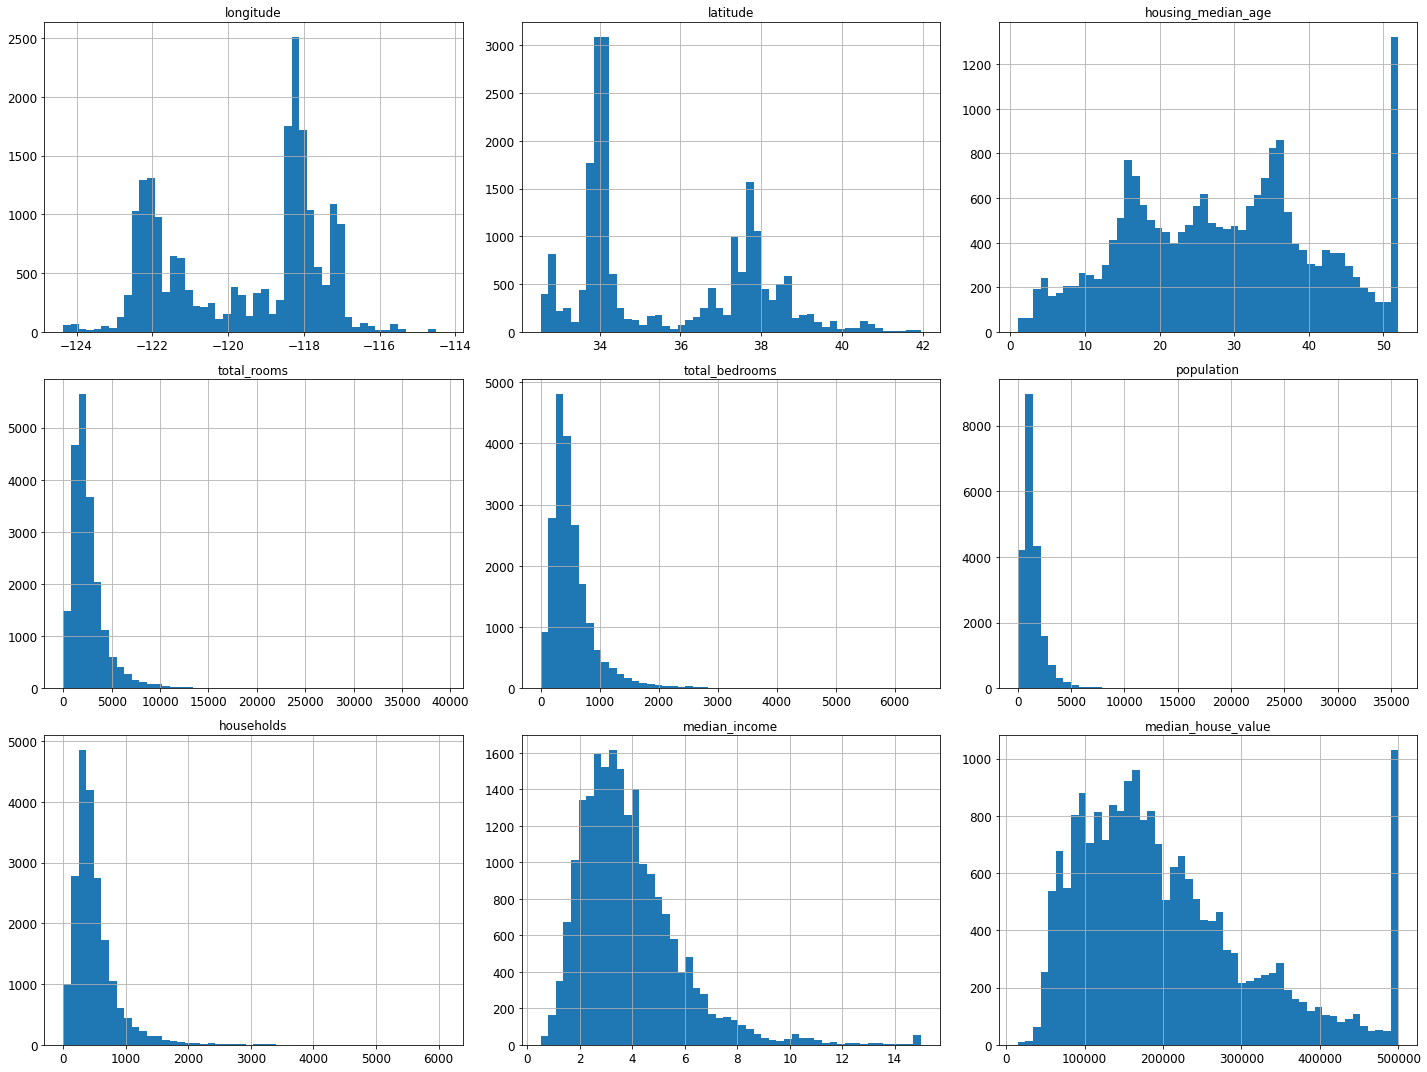

In [97]:
# 간단히 시각화를 하여 데이터 구조를 한눈에 볼 수 있다.
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

# Test Set 생성

# Train_Test Split 사용자 정의 함수
- 아래와 같이 Train_Test Split을 정의할 수 있다.
- 하지만 일반적인 경우에는 `sklearn.model_selection`안에 있는 `train_test_split`을 사용한다.

In [98]:
# test-Set을 변경하지 않기위해 아래 함수 정의

# Hash사용, digest가 python2에서는 정수가 아닌 문자열을 반환하여 권장하지 않는다.
import hashlib
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
# 만약 굳이 Hash를 사용하고 싶다면 아래와 같이 선언한다면 Python2,3 모두 사용 가능하다
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio
    
# checkSum을 이용하여 분류
from zlib import crc32
def test_set_check(indentifier, test_ratio):
    # checkSum을 생성하여 Test_Ratio보다
    # 낮은 값은 Test-Set으로 사용하고,
    # 높으면 다음 Train-Set으로 사용하겠다는 의미
    return crc32(np.int64(indentifier)) & 0xffffffff < test_ratio * 2**32

# test_set_check으로 Train Test나눠주는 함수
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
# `index` 열이 추가된 데이터프레임을 반환합니다
# 인덱스를 사용할 때 중복여부를 판단하고 사용해야한다.
housing_with_id = housing.reset_index()   
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [99]:
from sklearn.model_selection import train_test_split
# 강의영상과 동일한 결과값을 확인하기 위해 Radon_State에 42를 넣어줌
train_set, test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(len(train_set),len(test_set))

16512 4128


<AxesSubplot:>

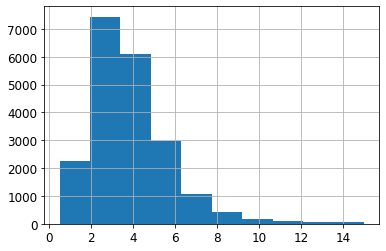

In [100]:
housing.median_income.hist()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64


<AxesSubplot:>

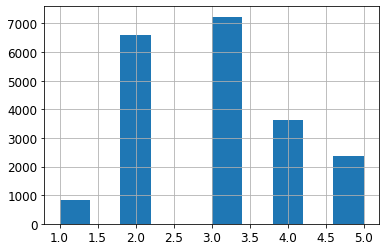

In [101]:
# 범주형으로 변경해주기
housing['income_cat'] = pd.cut(
    housing.median_income,
    # 아래 5개의 구역으로 구분하여 나눠줌
    bins = [0.,1.5,3.0,4.5,6.,np.inf],
    labels= [i for i in range(1,6)]
)
print(housing.income_cat.value_counts())
housing.income_cat.hist()

In [102]:
# Stratified : 계층형으로 
# StratifiedShuffleSplit : StratifiedKFold + ShuffleSplit
# 범주형으로 고르게 분할해줌
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_idx ,test_idx in split.split(housing,housing.income_cat):
    start_train_set = housing.loc[train_idx]
    start_train_set = housing.loc[test_idx]
print(
    start_train_set.income_cat.value_counts()/ len(start_train_set),
    housing.income_cat.value_counts()/ len(housing)
)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64 3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


In [103]:
# 위 과정이 복잡하지 않다면 train_test_split만으로도 구현할 수 있다.
train_set, test_set = train_test_split(
    housing,
    test_size=0.2,
    random_state=42,
    stratify= housing.income_cat
    )
print(len(train_set),len(test_set))

16512 4128


In [104]:
# 계층적(stratify)으로 나눴을때의 차이를 보여주는 셀
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(start_train_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [105]:
# 위 과정은 강의에서 이런 것이 있다고 보여주려는 코드들 이기 때문에
# income_cat을 제거해준다.
for set_ in (start_train_set, start_train_set):
    set_.drop("income_cat", axis=1, inplace=True)

KeyError: "['income_cat'] not found in axis"

# 데이터 탐색 및 시각화

In [106]:
# 켈리포니아 이미지 가져오기
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('../images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x236d3a0a790>)

단순 시각화
그림 저장: bad_visualization_plot


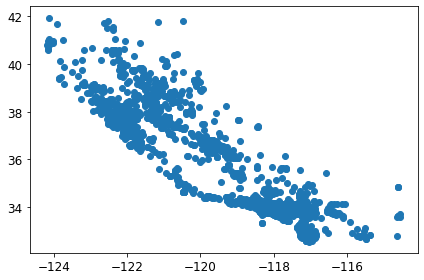

간단하게 설정한 시각화
그림 저장: better_visualization_plot


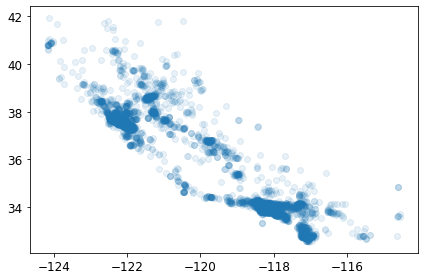

색 혹은 크기등 섬세하게 설정한 시각화
그림 저장: housing_prices_scatterplot


<Figure size 432x288 with 0 Axes>

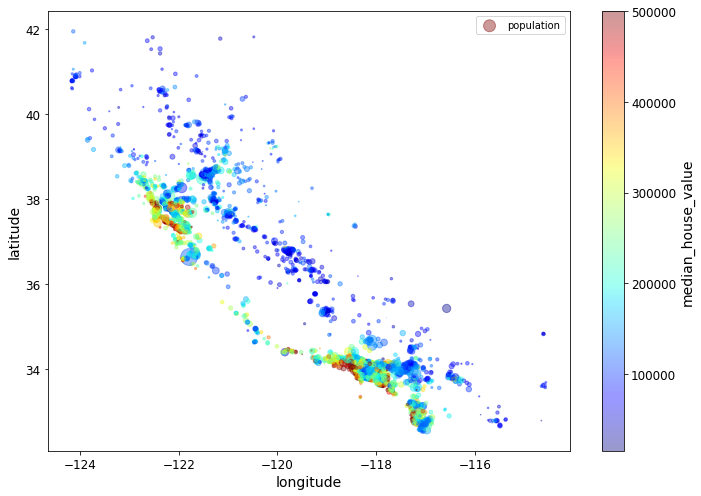

지도이미지와 겹쳐서 산점도 보여주기
그림 저장: california_housing_prices_plot


<Figure size 432x288 with 0 Axes>

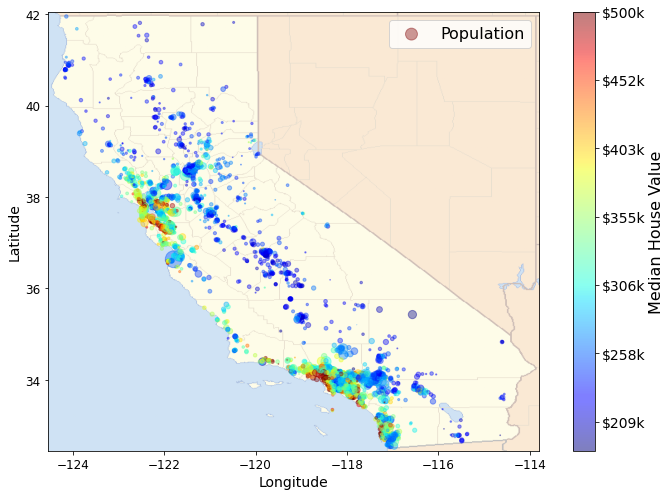

In [107]:
# rawDataFrame은 남겨두는 것이 좋다.
housing = start_train_set.copy()

print('단순 시각화')
# housing.plot(kind = 'scatter',x = 'longitude',y = 'latitude')
plt.scatter(housing.longitude, housing.latitude)
save_fig('bad_visualization_plot')
plt.show()

print('간단하게 설정한 시각화')
plt.clf()
# alpha : 투명도 설정
# housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.scatter(housing.longitude, housing.latitude,alpha=.1)
save_fig("better_visualization_plot")
plt.show()

plt.clf()
print('색 혹은 크기등 섬세하게 설정한 시각화')
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")
plt.show()
plt.clf()


# 켈리포니아 이미지와 데이터를 겹쳐서 시각화하기
print('지도이미지와 겹쳐서 산점도 보여주기')
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population", # 원 크기
                  c="median_house_value", # 색
                  cmap=plt.get_cmap("jet"), # jet = 높으면 빨강, 낮으면 파랑
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()



In [108]:
# 상관계수 보기
corr_mat = housing.corr()
corr_mat.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691867
total_rooms           0.131296
housing_median_age    0.071210
households            0.070947
total_bedrooms        0.057247
population           -0.016164
longitude            -0.039848
latitude             -0.150336
Name: median_house_value, dtype: float64

그림 저장: scatter_matrix_plot


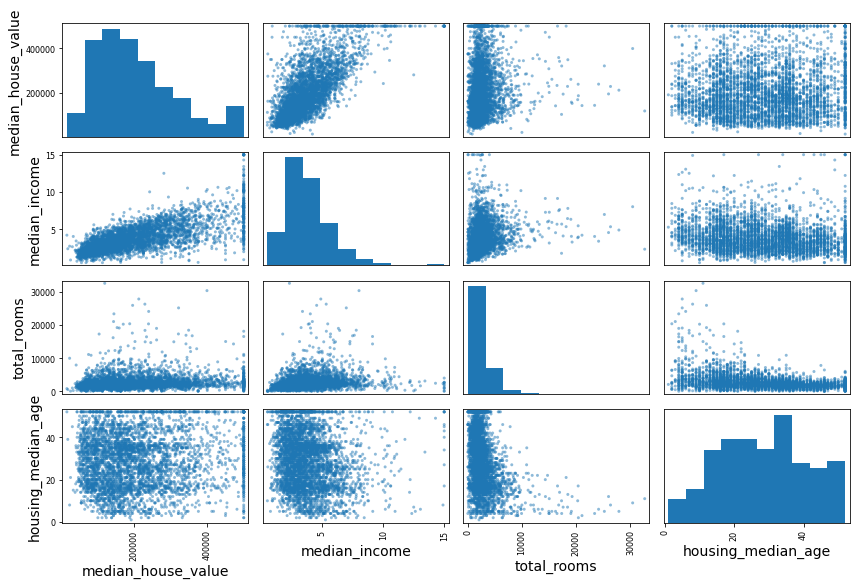

In [109]:
# from pandas.tools.plotting import scatter_matrix # 옛날 버전의 판다스에서는
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

그림 저장: income_vs_house_value_scatterplot


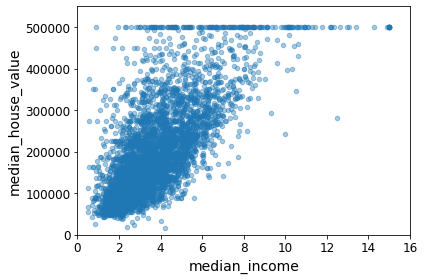

In [110]:
# 위에서 
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.4)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

# 특성 조합으로도 확인해보기

median_house_value          1.000000
median_income               0.691867
rooms_per_household         0.192731
total_rooms                 0.131296
housing_median_age          0.071210
households                  0.070947
total_bedrooms              0.057247
population                 -0.016164
longitude                  -0.039848
population_per_household   -0.134999
latitude                   -0.150336
bedrooms_per_room          -0.240481
Name: median_house_value, dtype: float64


<Figure size 432x288 with 0 Axes>

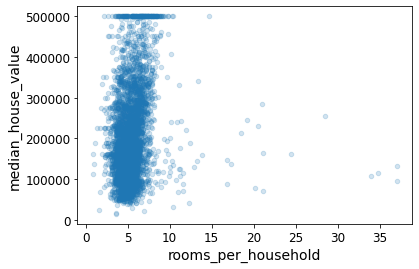

In [111]:
housing["rooms_per_household"] = housing.total_rooms/housing.households
housing["bedrooms_per_room"] = housing.total_bedrooms/housing.total_rooms
housing["population_per_household"]=housing.population/housing.households

corr_mat = housing.corr()
print(corr_mat.median_house_value.sort_values(ascending=False))
# Plot을 이용하면 더 쉽게 확인할 수 있다.
plt.clf()
housing.plot(
    kind="scatter",
    x="rooms_per_household",
    y="median_house_value",
    alpha=0.2
    )
plt.show()

In [112]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,4128.000000,4128.000000,4128.000000,4128.000000,4079.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4079.000000,4128.000000
mean,-119.545981,35.602049,28.583818,2688.656250,549.721746,1448.634205,509.651163,3.849818,206257.795058,5.383375,0.213705,2.967399
std,2.010400,2.127889,12.629796,2345.997876,454.528621,1197.164964,407.677609,1.879332,114176.653346,1.822694,0.060349,1.584661
min,-124.180000,32.550000,1.000000,2.000000,1.000000,5.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,1.089286
25%,-121.780000,33.920000,18.000000,1474.000000,301.000000,805.750000,283.000000,2.542675,118900.000000,4.434273,0.175927,2.424681
50%,-118.460000,34.220000,28.000000,2159.500000,442.000000,1172.500000,416.000000,3.513200,181300.000000,5.218307,0.203604,2.822308
75%,-117.980000,37.690000,37.000000,3171.250000,653.000000,1754.250000,613.250000,4.739225,268850.000000,6.031716,0.239791,3.286534
max,-114.560000,41.950000,52.000000,32627.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000,37.063492,1.000000,63.750000


# 머신러닝 알고리즘을 위한 데이터 준비

In [114]:
housing = start_train_set.drop("median_house_value",axis=1)
housing_labels = start_train_set["median_house_value"].copy()

간단한 데이터 정제 옵션

---
housing.dropna(subset = ['total_bedrooms'])
- total_bedrooms값이 결측치면 없애기
- Row 증 행을 삭제함
---

housing.drop('total_bedrooms',axis = 1)
- total_bedrooms값삭제하기
- total_bedrooms에 결측값이 있음으로 칼럼 자체를 삭제

--- 
```python
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median,inplace = True)
```
- total_bedrooms의 결측값에 `중앙값` 삽입